In [110]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = load_diabetes(as_frame=True).frame
print('Dataset sample:')
print(dataset.head())
print('Dataset info:')
print(dataset.info())
print('Dataset description')
print(dataset.describe())

Dataset sample:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     4

In [111]:
X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
metrics = [
    ['RMSE', f'{rmse:.2f}'],
    ['R2 score', f'{r2:.2f}'],
    ['MAE', f'{mae:.2f}']
]
print('Model performance:')
print(tabulate(metrics, headers=['Metric', 'Value'], tablefmt='grid'))

features_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)
print('Features importance:')
print(tabulate(features_importance[['Feature', 'Coefficient']].values, headers=['Feature', 'Coefficient'], tablefmt='grid', floatfmt='.2f'))

Model performance:
+----------+---------+
| Metric   |   Value |
+==========+=========+
| RMSE     |   53.85 |
+----------+---------+
| R2 score |    0.45 |
+----------+---------+
| MAE      |   42.79 |
+----------+---------+
Features importance:
+-----------+---------------+
| Feature   |   Coefficient |
+===========+===============+
| s1        |        -44.45 |
+-----------+---------------+
| s5        |         35.16 |
+-----------+---------------+
| bmi       |         25.61 |
+-----------+---------------+
| s2        |         24.64 |
+-----------+---------------+
| bp        |         16.83 |
+-----------+---------------+
| s4        |         13.14 |
+-----------+---------------+
| sex       |        -11.51 |
+-----------+---------------+
| s3        |          7.68 |
+-----------+---------------+
| s6        |          2.35 |
+-----------+---------------+
| age       |          1.75 |
+-----------+---------------+


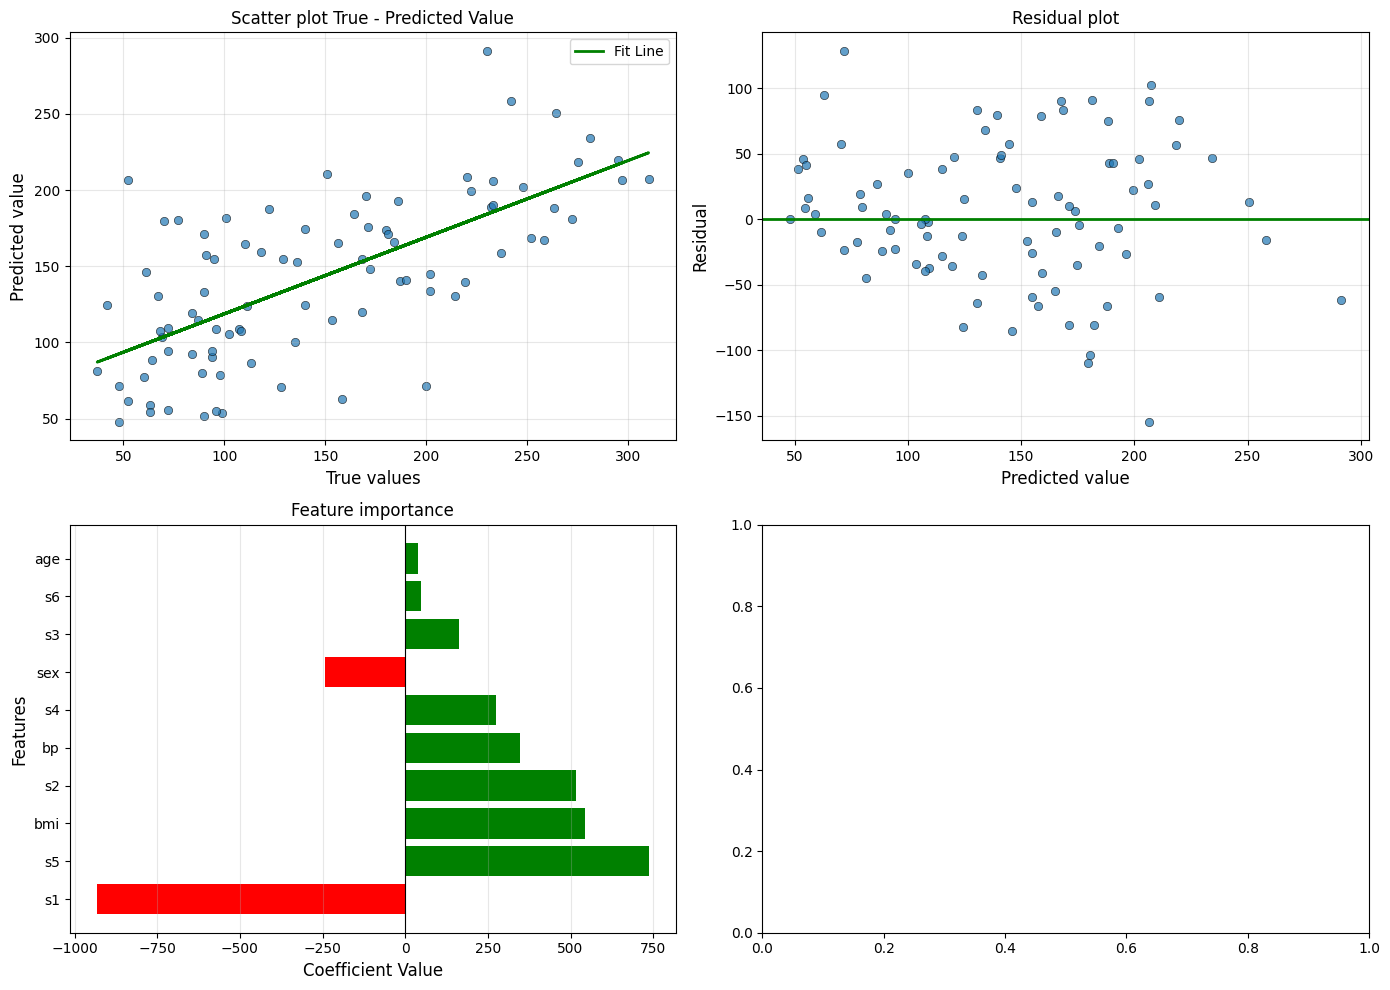

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Scatter plot with lines

axes[0,0].scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k', linewidth=0.5)
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
axes[0,0].plot(y_test, p(y_test), 'g-', lw=2, label='Fit Line')
axes[0,0].set_xlabel('True values', fontsize=12)
axes[0,0].set_ylabel('Predicted value', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0, 0].set_title('Scatter plot True - Predicted Value')

# Residual plot

residuals = y_test - y_test_pred
axes[0,1].scatter(y_test_pred, residuals, alpha=0.7, edgecolors='k', linewidth=0.5)
axes[0,1].axhline(y=0, color='g', linestyle='-', lw=2)
axes[0,1].set_xlabel('Predicted value', fontsize=12)
axes[0,1].set_ylabel('Residual', fontsize=12)
axes[0,1].grid(True, alpha=0.3)
axes[0, 1].set_title('Residual plot')

# Features importances

colors = ['green' if x > 0 else 'red' for x in features_importance['Coefficient']]
axes[1, 0].barh(features_importance['Feature'], features_importance['Coefficient'], color=colors)
axes[1, 0].axvline(x=0, color='black', linestyle='-', lw=0.8)
axes[1, 0].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 0].set_ylabel('Features', fontsize=12)
axes[1,0].set_title('Feature importance')
axes[1,0].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../models/model_diabetes_v0.1_result.png', dpi=300, bbox_inches='tight')

In [134]:
with open('../models/scaler_diabetes_v0.1.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('../models/model_diabetes_v0.1.pkl', 'wb') as file:
    pickle.dump(model, file)
print('Save scaler and models to ../models folder')

Save scaler and models to ../models folder


## Version 0.2

In [141]:
from sklearn.feature_selection import SelectKBest, f_regression
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=6)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['bmi', 'bp', 's3', 's4', 's5', 's6'], dtype='object')


In [136]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_sel, y_train)
y_pred_lr = model_lr.predict(X_test_sel)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_sel, y_train)
model_ridge = ridge_grid.best_estimator_
y_pred_ridge = model_ridge.predict(X_test_sel)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random.fit(X_train_sel, y_train)
model_rf = rf_random.best_estimator_
y_pred_rf = model_rf.predict(X_test_sel)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

results = {
    'LinearRegression': {'RMSE': rmse_lr, 'R2': r2_lr, 'MAE': mae_lr},
    'Ridge': {'RMSE': rmse_ridge, 'R2': r2_ridge, 'MAE': mae_ridge},
    'RandomForest': {'RMSE': rmse_rf, 'R2': r2_rf, 'MAE': mae_rf}
}
results

{'LinearRegression': {'RMSE': 53.8543649707789,
  'R2': 0.4525840776044413,
  'MAE': 44.31272710685382},
 'Ridge': {'RMSE': 53.80566978788088,
  'R2': 0.453573578345874,
  'MAE': 44.32158025362831},
 'RandomForest': {'RMSE': 52.601738077862066,
  'R2': 0.4777531901409384,
  'MAE': 42.52143162453861}}

In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True],
    'max_samples': [0.7, 0.8, 0.9]
}
rf_random = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_root_mean_squared_error')
rf_random.fit(X_train_sel, y_train)
model_rf = rf_random.best_estimator_
y_pred_rf = model_rf.predict(X_test_sel)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

results = {
    'RandomForest': {'RMSE': rmse_rf, 'R2': r2_rf, 'MAE': mae_rf}
}
print(results)
print(rf_random.best_params_)

{'RandomForest': {'RMSE': 52.56354676704734, 'R2': 0.47851126583810133, 'MAE': 43.27356256683105}}
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [157]:
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=5)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]

rf_best_params = {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}

model = RandomForestRegressor(**rf_best_params, random_state=42)
model.fit(X_train_sel, y_train)
y_pred_rf = model.predict(X_test_sel)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

results = {
    'RandomForest': {'RMSE': rmse_rf, 'R2': r2_rf, 'MAE': mae_rf}
}
print(results)

{'RandomForest': {'RMSE': 52.25249467143123, 'R2': 0.48466496827834415, 'MAE': 42.968594044072624}}
